In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [243]:
x = [0.5, 2.5]
y= [0.2, 0.9]

In [244]:
W1=np.random.rand(1,3)[0]

In [245]:
W1

array([0.74099371, 0.70408461, 0.04777197])

In [246]:
W2=np.random.rand(3,1).T[0]

In [247]:
W2

array([0.15079476, 0.22990071, 0.35954991])

In [248]:
b1=np.random.rand(1,3)[0]

In [249]:
b1

array([0.050095  , 0.02975476, 0.46331683])

In [250]:
b2=np.random.rand(1,1)[0]

In [251]:
b2

array([0.90426822])

In [252]:
A1=np.dot(x[0],W1)+b1

In [253]:
A1

array([0.42059185, 0.38179706, 0.48720282])

In [254]:
np.dot(sigmoid(A1),W2)

2.095902002029046

In [255]:
sigmoid(1)

1.5819767068693265

In [256]:
def sigmoid(A):
    return (1/(1-np.exp(-A))) 

In [257]:
def forward_prop(W1,W2,b1,b2,X):
    A1=np.dot(X,W1)+b1
    Z1=sigmoid(A1)
    A2=np.dot(Z1,W2)+b2
    Z2=sigmoid(A2)
    return A1,Z1,A2,Z2   

In [258]:
def calc_se_loss(Z2,Y):
    return (Z2-Y)**2/2
    

In [259]:
def backprop(A1,Z1,A2,Z2,Y,W2,b2):
    deltafinal=(Z2[0]-Y)*Z2[0]*(1-Z2[0])
    deltabias=deltafinal*b2[0]*sigmoid(1)*(1-sigmoid(1))
    delta11=deltafinal*W2[0]*Z1[0]*(1-Z1[0])
    delta12=deltafinal*W2[1]*Z1[1]*(1-Z1[1])
    delta13=deltafinal*W2[2]*Z1[2]*(1-Z1[2])
    return deltafinal,delta11,delta12,delta13,deltabias

In [260]:
def initialize_momentum(W1,W2,b1,b2):
    momentum={}
    for i in range(len(W1)):
        momentum['W1'+str(i)]=0
    for i in range(len(b1)):
        momentum['b1' + str(i)]=0
    for i in range(len(W2)):
        momentum['W2' + str(i)]=0
    for i in range(len(b2)):
        momentum['b2'+ str(i)]=0
    return momentum
    
    

In [261]:
def update_weights_using_momentum(W1,W2,b1,b2,df,d11,d12,d13,db,momentum):
    eta=0.1
    beta=0.95
    deltalayer1=[d11,d12,d13]
    for i in range(len(W1)):
        momentum['W1'+str(i)]=beta*momentum['W1'+str(i)]+eta*deltalayer1[i]*W1[i]
        W1[i]-=momentum['W1'+str(i)]
    for i in range(len(W2)):
        momentum['W2'+str(i)]=beta*momentum['W2'+str(i)]+eta*df*W2[i]
        W2[i]-=momentum['W2'+str(i)]
    for i in range(len(b1)):
        momentum['b1'+ str(i)]=beta*momentum['b1'+ str(i)]+eta*deltalayer1[i]*b1[i]
        b1[i]-=momentum['b1'+ str(i)]
    for i in range(len(b2)):
        momentum['b2'+str(i)]=beta*momentum['b2'+str(i)]+eta*df*b2[i]
        b2[i]-=momentum['b2'+str(i)]
    
    return W1,W2,b1,b2
    
    
    

In [262]:
W1losssum=[0,0,0]
W2losssum=[0,0,0]
b1lossum=[0,0,0]
b2lossum=0
errors=[]
W1s=[]
W2s=[]
b1s=[]
b2s=[]
error=[]
momentum=initialize_momentum(W1,W2,b1,b2)
for j in range(50):
    error=[]
    for i in range(len(x)):
        A1,Z1,A2,Z2=forward_prop(W1,W2,b1,b2,x[i])
        error.append(calc_se_loss(Z2,y[0]))
        df,d11,d12,d13,db=backprop(A1,Z1,A2,Z2,y[i],W2,b2)
        W1,W2,b1,b2=update_weights_using_momentum(W1,W2,b1,b2,df,d11,d12,d13,db,momentum)
    W1s.append(W1.mean())
    W2s.append(W2.mean())
    b1s.append(b1.mean())
    b2s.append(b2.mean())
     #print(W1,W2.T,b1,b2)
    error=np.array(error)
    errors.append(error.sum())



Text(0, 0.5, 'root mean square error')

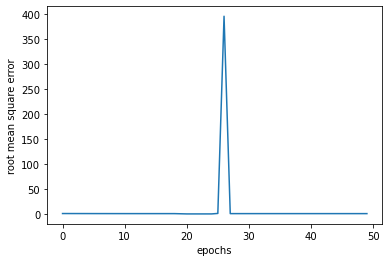

In [263]:
plt.plot(np.arange(len(errors)),errors)
plt.xlabel("epochs")
plt.ylabel("root mean square error")

In [264]:
from mpl_toolkits import mplot3d

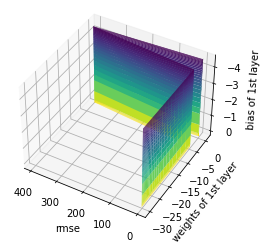

In [265]:
fig=plt.figure()
ax=plt.axes(projection='3d')
W1s,b1s=np.meshgrid(W1s, b1s)
ax.plot_surface(errors,W1s,b1s,cmap='viridis')
ax.set_xlabel("rmse")
ax.set_ylabel("weights of 1st layer")
ax.set_zlabel("bias of 1st layer")
ax.view_init(-140, 60)

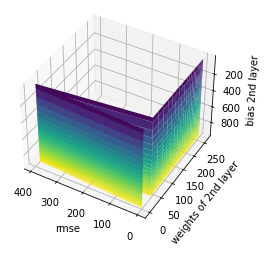

In [266]:
fig=plt.figure()
ax=plt.axes(projection='3d')
W2s,b2s=np.meshgrid(W2s, b2s)
ax.plot_surface(errors,W2s,b2s,cmap='viridis')
ax.set_xlabel("rmse")
ax.set_ylabel("weights of 2nd layer")
ax.set_zlabel("bias 2nd layer")
ax.view_init(-140, 60)